In [ ]:
#librerias
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
from sklearn.compose import ColumnTransformer #data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing
from sklearn.impute import KNNImputer #handle missing values
from sklearn.model_selection import train_test_split #train/test dataset
#from tensorflow.keras import layers, models #neural network architecture
#from tensorflow.keras.metrics import BinaryAccuracy #model evaluation
#from tensorflow.keras.callbacks import EarlyStopping #regularization
#from tensorflow import keras #keras
#import tensorflow as tf #tensorflow
from sklearn.metrics import accuracy_score, recall_score, precision_score #evaluate model

In [3]:
#leer el Dataset
pd.set_option('display.max_columns', None)
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#estadisticas sobre los datos
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#porcentaje del conjunto de datos con enfermedad cardiaca
perc_dis = heart_data['HeartDisease'].sum() / len(heart_data)
print('Porcentaje del conjunto de datos con enfermedad cardiaca:', round(perc_dis, 4))

Porcentaje del conjunto de datos con enfermedad cardiaca: 0.5534


In [7]:
#Creamos listas de columnas basadas en los tipos de datos/como los datos deven visualizarse
#variables cualitativas
cat_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
#variables cuantitativas
num_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
#etiqueta
label = 'HeartDisease'

In [12]:
#Funciones para el pintado de variables

#funcion para pintar variables cualitativas como un grafico de barras
def display_barchart(data, var, label):
    #calcula el numero de pacientes en cada categoria vs las enfermedades cardiacas
    grp = data.groupby([var, label])[var].count().unstack().reset_index()

    labels = list(grp.iloc[:, 0].values)
    no_dis = list(grp.iloc[:, 1].values) #paciente sin enfermedad cardiaca
    yes_dis = list(grp.iloc[:, 2].values) #paciente con enfermedad cardiaca

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, no_dis, width, label='Healthy')
    rects2 = ax.bar(x + width/2, yes_dis, width, label='Heart Disease')

    # añadir textos para las etiquetas, titulos para los ejes, etc
    ax.set_ylabel('Number of Patients')
    ax.set_xlabel(var)
    ax.set_title('Heart Disease by ' + var)
    ax.set_xticks(x) # valores
    ax.set_xticklabels(labels) # etiquetas
    ax.legend()

    fig.tight_layout()
    plt.show()
    
    

#funcion para pintar variables cuantitativas como un kdechart
def display_kdechart(data, var, label):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(var, hue='HeartDisease', data=heart_data)
    plt.title('Heart Disease by ' + var + ' Distribution')
    plt.show()

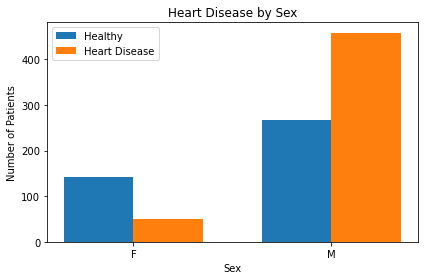

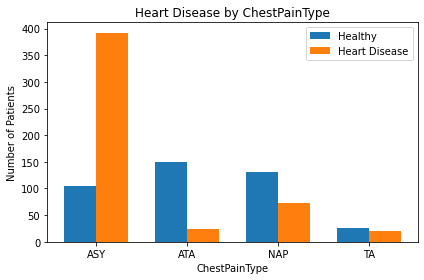

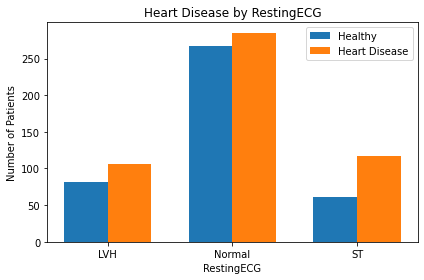

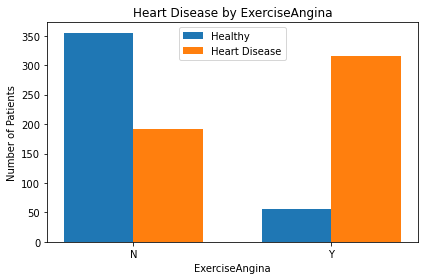

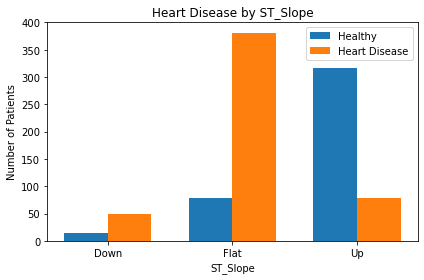

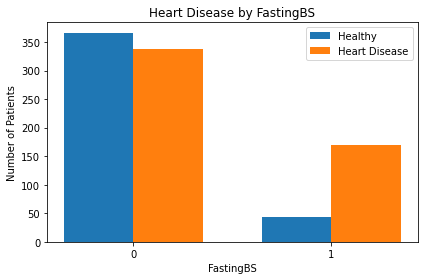

In [13]:
#plots catagoric valriables
for var in cat_vars:
    display_barchart(heart_data, var, label)

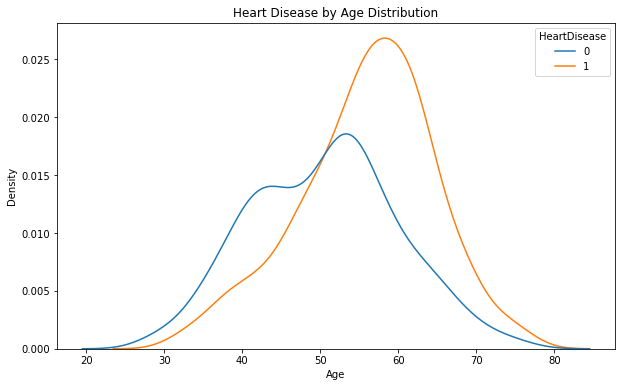

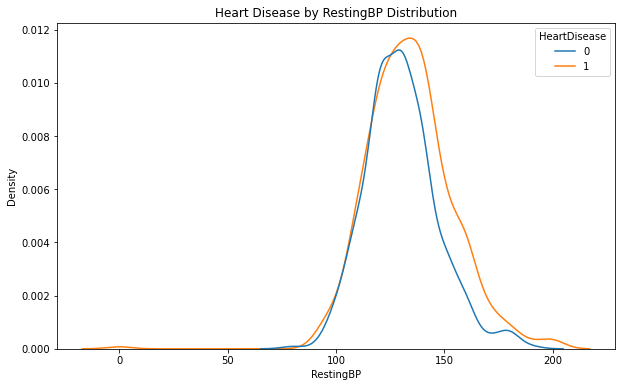

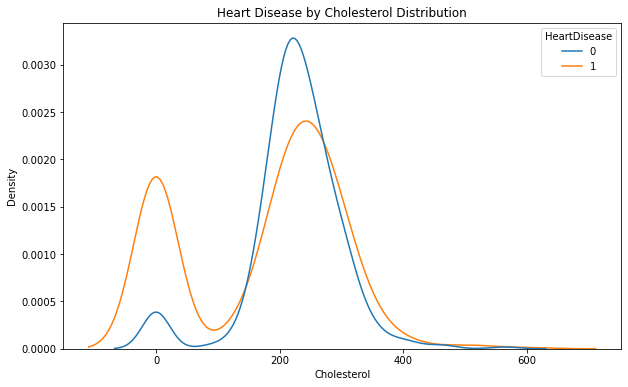

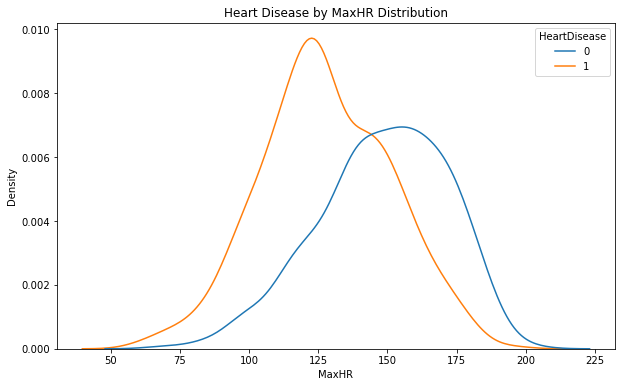

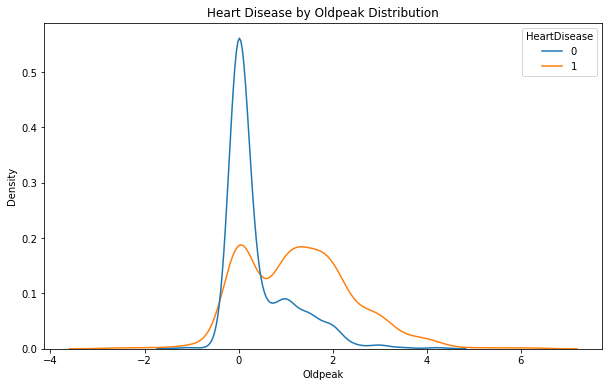

In [14]:
#dibujar variables cuantitativas
for var in num_vars:
    display_kdechart(heart_data, var, label)